![IPP Logo](Img/ipplogo.png)

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>RAMP on Relative Humidity Prediction in Morocco</title>
    <style>
        .title {
            font-size: 50px;
            font-weight: bold;
            background: linear-gradient(45deg, #1a237e, #0d47a1);
            color: white;
            padding: 10px;
            margin-bottom: 40px;
            marin-top: 40px;
            display: flex;
            align-items: center;  /* Centers text vertically */
            justify-content: center; /* Centers text horizontally */
            height: 100px;  /* Set a fixed height */
        }
    </style>
</head>
<body>
    <div class="title">RAMP on Relative Humidity Prediction in Morocco</div>
</body>
</html>


**Zakaria Akil, Zakarya Elmimouni, Ahmed Khairaldin, Amine Razig, Khadija slim, Yassine Oj**

# Introduction

Relative Humidity is a measure of how much moisture is in the air compared to the maximum amount it can hold at a given temperature. It is expressed as a percentage, where 100% means the air is fully saturated with water vapor and cannot hold any more, leading to possible condensation (such as dew or fog).

The ability of air to hold moisture depends on temperature—warmer air can contain more water vapor, while cooler air holds less. This is why humidity often feels higher in warm weather, even if the actual amount of water vapor in the air hasn’t changed. For example, if the relative humidity is 50%, it means the air contains half the moisture it could potentially hold at that temperature. A high relative humidity (like 80–90%) makes the air feel damp and heavy, while a low relative humidity (like 20–30%) makes it feel dry, which can cause discomfort such as dry skin or irritation.


### Why relative humidity in Morocco ?

In Morocco, relative humidity plays a vital role in predicting droughts, managing water resources, and understanding climate variability. The country’s semi-arid and arid regions are highly sensitive to fluctuations in humidity, which affect soil moisture and crop yields. Low relative humidity accelerates evaporation from reservoirs and irrigation systems, intensifying water scarcity. In coastal and mountainous areas, humidity variations influence cloud formation and precipitation patterns, impacting agriculture and hydropower generation. By integrating relative humidity data into climate models, scientists and policymakers can better anticipate drought risks and optimize water management strategies to mitigate their effects.

### Dataset

<p align="center">
  <img src="Img/Copernicus vecto def  Europe's eyes on Earth.png" alt="Image 1" width="35%" style="margin-right: 30px;">
  <img src="Img/S5-45_C3S_logo.png" alt="Image 2" width="40%" style="margin-left: 10px;">
</p>


Our data comes from the **ERA5 data archive (Copernicus and Climate Change service)**, which provides hourly estimates for a large number of atmospheric, ocean-wave, and land-surface quantities. We collected data on pressure levels from 2020 to the present (01/03/2025) for both public and private datasets.  

Our dataset contains observations spaced 4 days apart within this period for geographical coordinates in Morocco and some adjacent land areas. The variables included in our dataset are:

- **Temperature**:  
  Temperature affects the saturation point of air, directly influencing relative humidity. Warmer air can hold more moisture, impacting humidity levels.

- **Wind (`u-component`, `v-component`)**:  
  Wind transports moisture and heat, influencing local humidity levels. Wind patterns determine moisture advection and drying effects in a region.

- **Cloud Cover**:  
  Clouds impact the radiation balance and surface evaporation, affecting local humidity levels.

- **Vertical Velocity**:  
  Vertical air movements influence condensation and evaporation processes, regulating relative humidity through adiabatic cooling and warming.

- **Geopotential**:  
  Geopotential height is related to atmospheric pressure and influences moisture transport and condensation processes.

- **Ozone**:  
  Ozone affects atmospheric temperature and stability, indirectly impacting humidity distribution.

- **Vorticity**:  
  Vorticity is an indicator of swirling air movements, which can redistribute moisture and influence humidity patterns.

- **Divergence**:  
  Wind divergence is related to the convergence and divergence of air masses, affecting humidity by regulating moisture fluxes in the atmosphere.

- **Target variable**: relative_humidity


### Table Structure:
Each row in the table represents an observation at a given time, at a fixed pressure level (1000 hPa), and at a specific geographic position (`latitude`, `longitude`). The columns contain the values of the different variables.

For the public dataset, we kept observations from 2020 until the end of 2022 as the training set and observations from 2023 as the test set. For the private data, we aim to predict relative humidity for the year 2024 and the beginning of 2025 using data from 2020 until the end of 2023 as the training set. The idea is that predicting relative humidity one year in advance is crucial for effective planning in various sectors, including agriculture, water resource management, and climate adaptation strategies.


# Exploratory data analysis

In [44]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain
pd.set_option('display.max_columns', None)
import problem

In [45]:
X_df, y = problem.get_train_data()
X_test_df, y_test = problem.get_test_data()

In [46]:
X_df.head()

,valid_time,pressure_level,latitude,longitude,expver,divergence,cloud_cover,geopotential,ozone,potential_vorticity,cloud_ice_water_content,cloud_liquid_water_content,rain_water_content,snow_water_content,temperature,u_component_wind,v_component_wind,vertical_velocity,relative_velocity
0,1420113600,1000.0,35.92,-17.00,1,0.000021,0.0,2850.4697,8.299719e-08,-2.155502e-09,0.0,0.0,0.0,0.0,285.65576,-6.009111,1.637948,0.050674,-0.000017
1,1420113600,1000.0,35.92,-16.75,1,0.000022,0.0,2852.4385,8.307632e-08,-2.155502e-09,0.0,0.0,0.0,0.0,285.56810,-5.939287,1.452157,0.051163,-0.000020
2,1420113600,1000.0,35.92,-16.50,1,0.000021,0.0,2854.1260,8.316454e-08,-2.155502e-09,0.0,0.0,0.0,0.0,285.49780,-5.838213,1.187509,0.056107,-0.000026
3,1420113600,1000.0,35.92,-16.25,1,0.000020,0.0,2854.4697,8.331233e-08,-4.600224e-09,0.0,0.0,0.0,0.0,285.49585,-5.731768,0.893807,0.046707,-0.000026
4,1420113600,1000.0,35.92,-16.00,1,0.000018,0.0,2853.3135,8.347877e-08,-2.155502e-09,0.0,0.0,0.0,0.0,285.51367,-5.624346,0.569100,0.035110,-0.000029


In [47]:
X_df.columns

Index(['valid_time', 'pressure_level', 'latitude', 'longitude', 'expver',
       'divergence', 'cloud_cover', 'geopotential', 'ozone',
       'potential_vorticity', 'cloud_ice_water_content',
       'cloud_liquid_water_content', 'rain_water_content',
       'snow_water_content', 'temperature', 'u_component_wind',
       'v_component_wind', 'vertical_velocity', 'relative_velocity'],
      dtype='object')

In [48]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193620 entries, 0 to 2193619
Data columns (total 19 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   valid_time                  int64  
 1   pressure_level              float64
 2   latitude                    float64
 3   longitude                   float64
 4   expver                      int64  
 5   divergence                  float64
 6   cloud_cover                 float64
 7   geopotential                float64
 8   ozone                       float64
 9   potential_vorticity         float64
 10  cloud_ice_water_content     float64
 11  cloud_liquid_water_content  float64
 12  rain_water_content          float64
 13  snow_water_content          float64
 14  temperature                 float64
 15  u_component_wind            float64
 16  v_component_wind            float64
 17  vertical_velocity           float64
 18  relative_velocity           float64
dtypes: float64(17), int64

In [49]:
X_df.describe()

,valid_time,pressure_level,latitude,longitude,expver,divergence,cloud_cover,geopotential,ozone,potential_vorticity,cloud_ice_water_content,cloud_liquid_water_content,rain_water_content,snow_water_content,temperature,u_component_wind,v_component_wind,vertical_velocity,relative_velocity
count,2.193620e+06,2193620.0,2.193620e+06,2.193620e+06,2193620.0,2.193620e+06,2.193620e+06,2.193620e+06,2.193620e+06,2.193620e+06,2.193620e+06,2.193620e+06,2.193620e+06,2.193620e+06,2.193620e+06,2.193620e+06,2.193620e+06,2.193620e+06,2.193620e+06
mean,1.514759e+09,1000.0,2.867000e+01,-9.000000e+00,1.0,1.750081e-06,1.250553e-03,1.451347e+03,7.064593e-08,-5.478568e-07,1.346301e-10,1.563244e-07,2.323781e-07,2.977975e-08,2.975711e+02,-1.408475e+00,-2.262360e+00,-3.715706e-02,2.047928e-07
std,5.469392e+07,0.0,4.257348e+00,4.690417e+00,0.0,2.786640e-05,2.227306e-02,4.504970e+02,1.027945e-08,1.010766e-06,1.732262e-08,3.959637e-06,3.540059e-06,2.264411e-06,8.516798e+00,4.089592e+00,4.309401e+00,1.286085e-01,3.870246e-05
min,1.420114e+09,1000.0,2.142000e+01,-1.700000e+01,1.0,-3.716801e-04,0.000000e+00,-5.454443e+02,1.923523e-08,-2.670536e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.798657e+02,-2.602483e+01,-2.352724e+01,-1.667595e+00,-5.467860e-04
25%,1.467331e+09,1000.0,2.492000e+01,-1.300000e+01,1.0,-9.088708e-06,0.000000e+00,1.133225e+03,6.452867e-08,-9.608334e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.909370e+02,-4.346982e+00,-5.116563e+00,-5.715412e-02,-1.739361e-05
50%,1.514678e+09,1000.0,2.867000e+01,-9.000000e+00,1.0,3.603614e-06,0.000000e+00,1.417358e+03,7.163077e-08,-4.921594e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.947715e+02,-1.496298e+00,-2.018729e+00,-1.713741e-02,-4.395144e-06
75%,1.562069e+09,1000.0,3.242000e+01,-5.000000e+00,1.0,1.481111e-05,0.000000e+00,1.742531e+03,7.790573e-08,-5.431502e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.037932e+02,1.292292e+00,5.635071e-01,1.468778e-02,1.301493e-05
max,1.609243e+09,1000.0,3.592000e+01,-1.000000e+00,1.0,3.958838e-04,1.000000e+00,3.353868e+03,1.079865e-07,3.662080e-05,9.186566e-06,7.166862e-04,4.902929e-04,6.445944e-04,3.204949e+02,2.485955e+01,2.370410e+01,2.105904e+00,6.298525e-04


## Missing values 

In [50]:
X_df.isnull().sum()

valid_time                    0
pressure_level                0
latitude                      0
longitude                     0
expver                        0
divergence                    0
cloud_cover                   0
geopotential                  0
ozone                         0
potential_vorticity           0
cloud_ice_water_content       0
cloud_liquid_water_content    0
rain_water_content            0
snow_water_content            0
temperature                   0
u_component_wind              0
v_component_wind              0
vertical_velocity             0
relative_velocity             0
dtype: int64

There is no missing values 

## Outliers

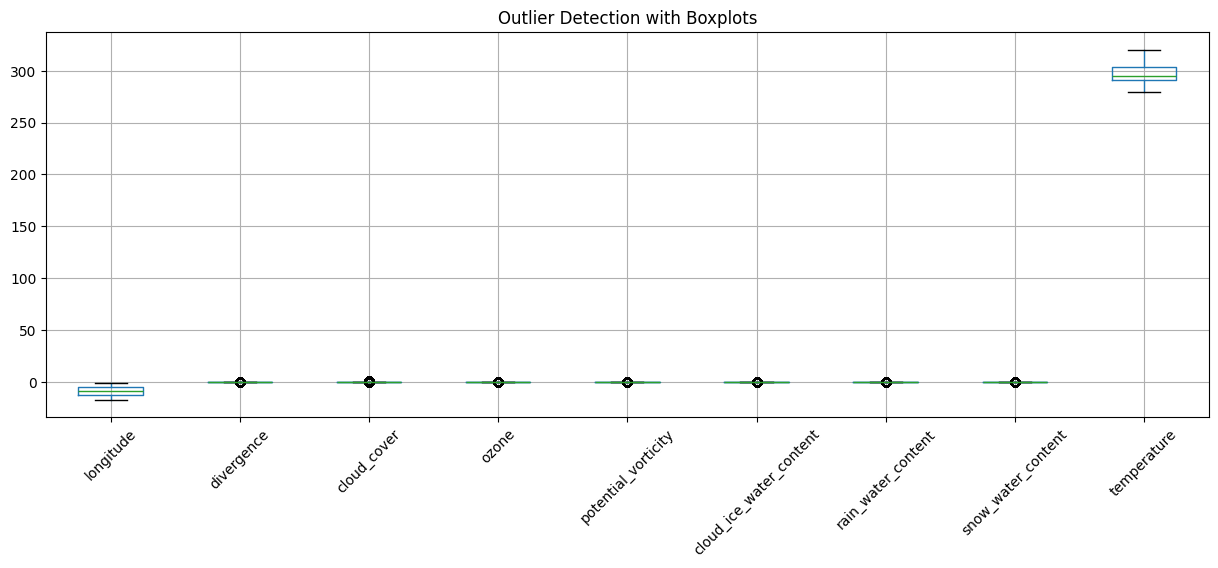

In [51]:

#  Nummericals columns and boxplot

numeric_cols =['pressure_level', 'longitude',
       'divergence', 'cloud_cover', 'ozone',
       'potential_vorticity', 'cloud_ice_water_content',
        'rain_water_content',
       'snow_water_content', 'temperature', 
     'vertical_velocity', 'relative_velocity']

plt.figure(figsize=(15, 5))
X_df[numeric_cols[1:10]].boxplot()
plt.xticks(rotation=45)
plt.title("Outlier Detection with Boxplots")
plt.show()


The variables of iterest do not exhibit any outliers.

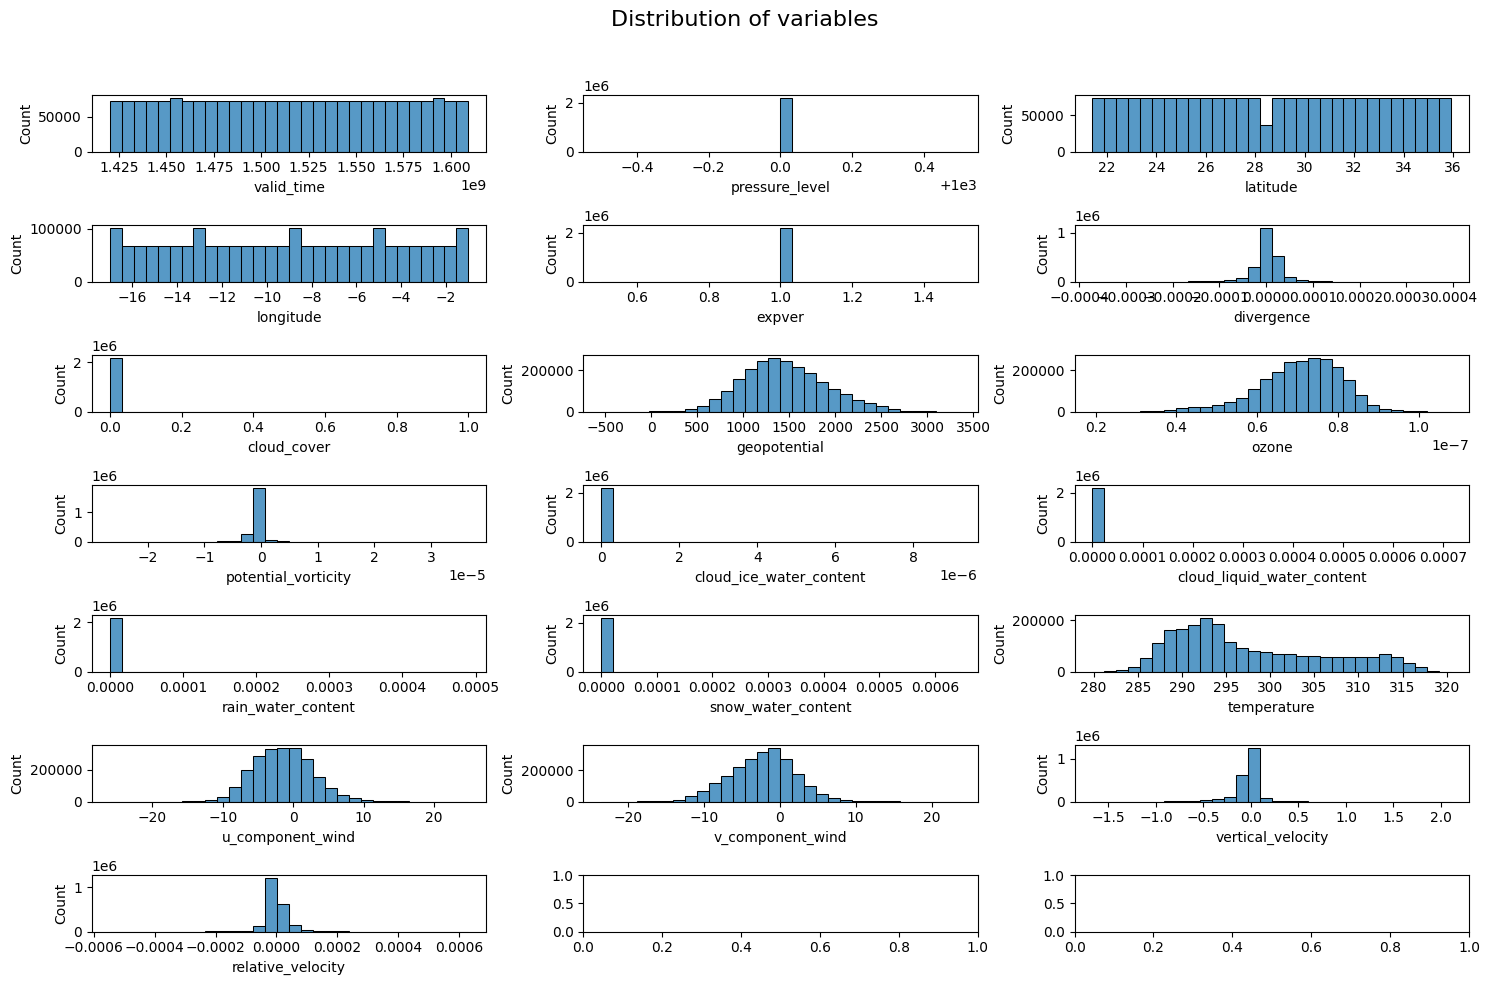

In [52]:
fig, axes = plt.subplots(nrows=len(X_df.columns)//3 + 1, ncols=3, figsize=(15, 10))
fig.suptitle("Distribution of variables", fontsize=16)

for i, column in enumerate(X_df.columns):
    sns.histplot(X_df[column], bins=30, kde=False, ax=axes[i//3, i%3], edgecolor='black')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

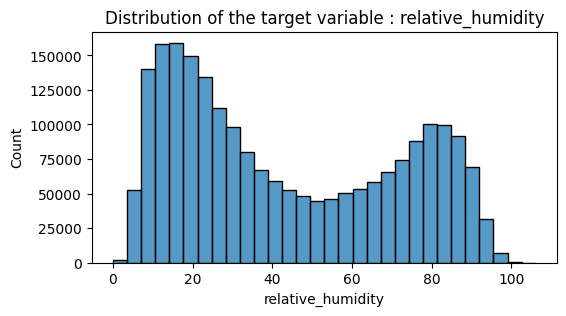

In [ ]:
# Distribution of the target variable
plt.figure(figsize=(6, 3))
sns.histplot(y, bins=30, kde=False, edgecolor='black')
plt.xlabel("relative_humidity")
plt.title("Distribution of the target variable : relative_humidity")
plt.show()

## Low Variance Colonnes 

In [55]:
low_variance_cols = [col for col in X_df.columns if X_df[col].nunique() == 1]
print("Columns with Low Variance:", low_variance_cols)

Columns with Low Variance: ['pressure_level', 'expver']


Dropping these columns might be a good idea since they are not very informative.









## Spacial Plots

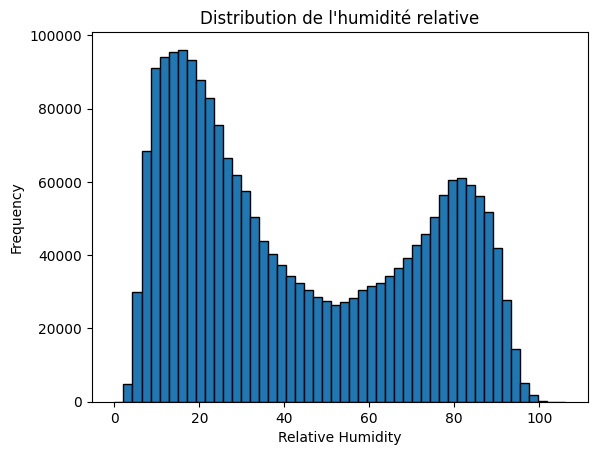

In [58]:
plt.hist(y, bins=50, edgecolor="black")
plt.xlabel("Relative Humidity")
plt.ylabel("Frequency")
plt.title("Distribution de l'humidité relative")
plt.show()

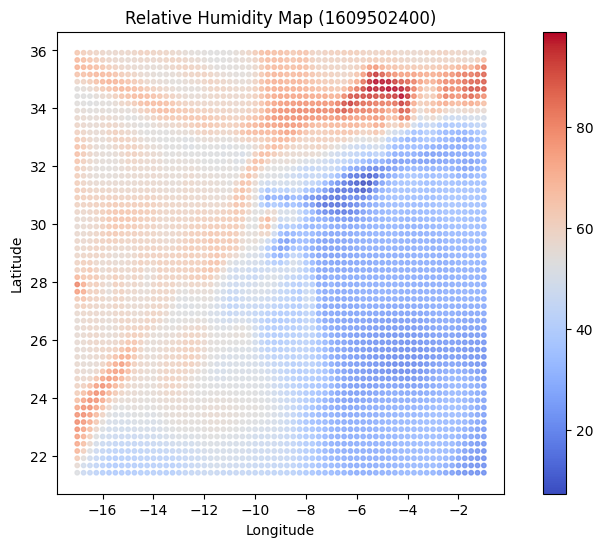

In [ ]:
import geopandas as gpd

def plot_humidity_map_geopandas(X, y, date, lat_col="latitude", lon_col="longitude", humidity_col="relative_humidity", time_col="valid_time"):
    """
    Displays a geographic map using GeoPandas, showing relative humidity for a given date.

    Parameters:
    - data : DataFrame containing the weather data.
    - date : Specific timestamp (Unix format or compatible with `valid_time`).
    - lat_col : Column name for latitude values.
    - lon_col : Column name for longitude values.
    - humidity_col : Column name representing relative humidity.
    - time_col : Column name containing timestamps.
    """
    # specified date
    data = X.copy()
    data['relative_humidity'] = y
    subset = data[data[time_col] == date]

    if subset.empty:
        print(f"No data found for the date {date}.")
        return


    gdf = gpd.GeoDataFrame(subset, geometry=gpd.points_from_xy(subset[lon_col], subset[lat_col]), crs="EPSG:4326")

    # Create the figure
    fig, ax = plt.subplots(figsize=(10, 6))
    gdf.plot(column=humidity_col, cmap="coolwarm", markersize=10, alpha=0.8, legend=True, ax=ax)

 

    ax.set_title(f"Relative Humidity Map ({date})")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

    plt.show()


example_date = X_test_df["valid_time"].iloc[0]
plot_humidity_map_geopandas(X_test_df,y_test, example_date)


## Temporal Analysis

Evolution of the mean humidity over time 

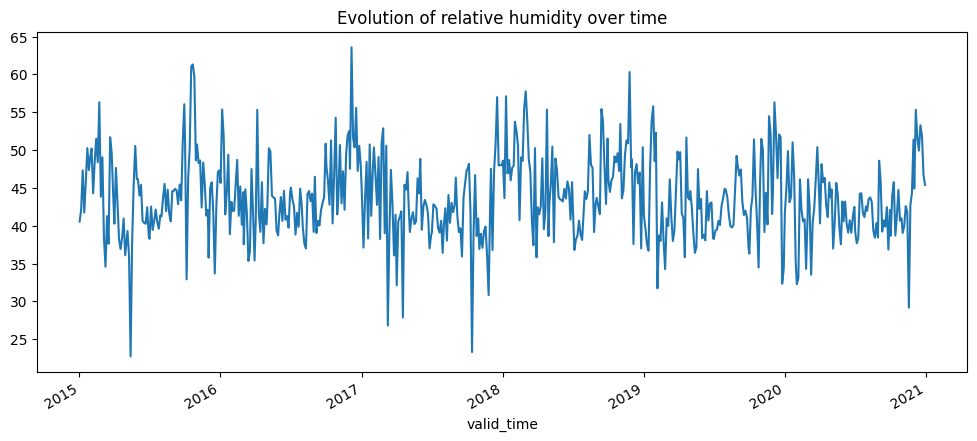

In [63]:
# Create a temporary dataframe with datetime and relative humidity
temp_df = pd.DataFrame({
    'valid_time': X_df["valid_time"],
    'relative_humidity': y
})
temp_df["valid_time"] = pd.to_datetime(temp_df["valid_time"], unit='s')  # Adapter selon format
temp_df.groupby("valid_time")["relative_humidity"].mean().plot(figsize=(12, 5), title="Evolution of relative humidity over time")
plt.show()

Now, we will examine the evolution in a region near Rabat, the capital.

First, we will find the nearest coordinates to Rabat.

In [ ]:
from scipy.spatial import KDTree

# Target latitude and longitude ( near Rabat)
latitude_target = 34.0
longitude_target = -6.8

# Build a k-d tree to search for the nearest point
coords = X_df[["latitude", "longitude"]].values
tree = KDTree(coords)
_, idx = tree.query([latitude_target, longitude_target])

# Retrieve the actual nearest coordinates
closest_lat, closest_lon = X_df.iloc[idx][["latitude", "longitude"]]
print(f"the nearest Coordinate we found : Latitude={closest_lat}, Longitude={closest_lon}")


the nearest Coordinate we found : Latitude=33.92, Longitude=-6.75


the coordinate we found are Indeed near to Rabat 

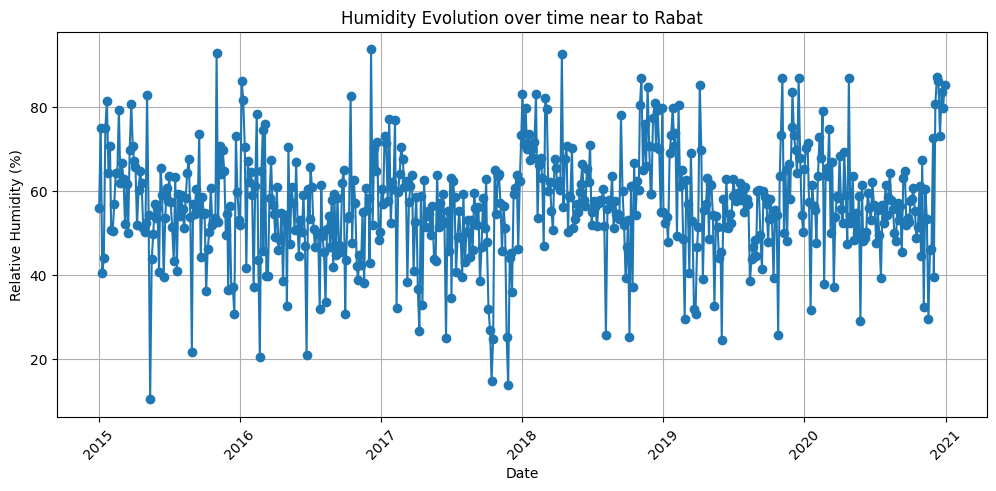

In [65]:
location_data = X_df[
    (X_df["latitude"] == closest_lat) &
    (X_df["longitude"] == closest_lon)
].copy()

location_target = y[location_data.index]

# Convert in the good format
location_data["valid_time"] = pd.to_datetime(location_data["valid_time"], unit='s')

plt.figure(figsize=(12, 5))
plt.plot(location_data["valid_time"], location_target, marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Relative Humidity (%)")
plt.title(f"Humidity Evolution over time near to Rabat")
plt.xticks(rotation=45)
plt.grid()
plt.show()


We will apply the same approach to another Saharan location: Errachidia

In [66]:
# Define a target Saharan city
latitude_target = 31.93  # Errachidia
longitude_target = -4.42

coords = X_df[["latitude", "longitude"]].values
tree = KDTree(coords)
_, idx = tree.query([latitude_target, longitude_target])

closest_lat, closest_lon = X_df.iloc[idx][["latitude", "longitude"]]
print(f"Nearest coordinates found: Latitude={closest_lat}, Longitude={closest_lon}")



Nearest coordinates found: Latitude=31.92, Longitude=-4.5


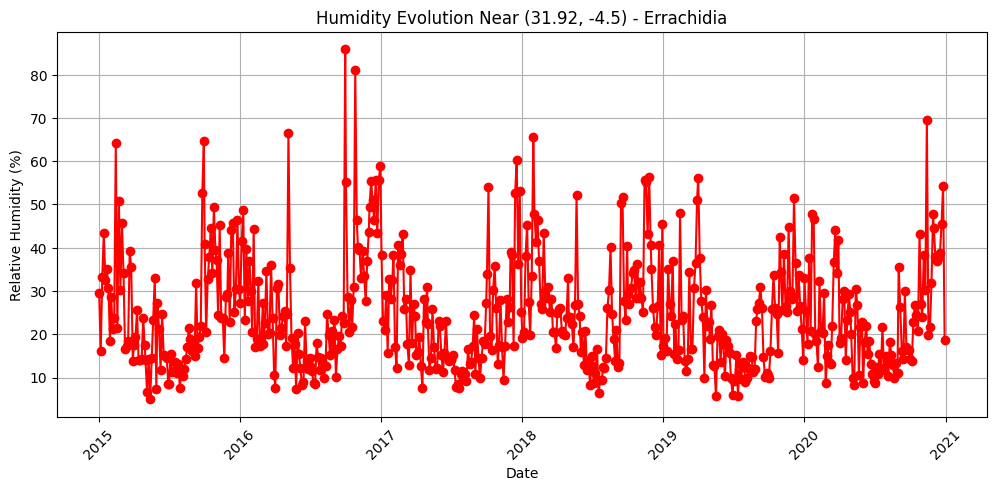

In [67]:
location_data = X_df[
    (X_df["latitude"] == closest_lat) &
    (X_df["longitude"] == closest_lon)
].copy()

location_target = y[location_data.index]

location_data["valid_time"] = pd.to_datetime(location_data["valid_time"], unit='s')

# evolution of humidity
plt.figure(figsize=(12, 5))
plt.plot(location_data["valid_time"], location_target, marker='o', linestyle='-', color="red")
plt.xlabel("Date")
plt.ylabel("Relative Humidity (%)")
plt.title(f"Humidity Evolution Near ({closest_lat}, {closest_lon}) - Errachidia")
plt.xticks(rotation=45)
plt.grid()
plt.show()



In Saharan regions, the humidity is low.

## Correlation Between variables 

In [68]:
X_df.columns

Index(['valid_time', 'pressure_level', 'latitude', 'longitude', 'expver',
       'divergence', 'cloud_cover', 'geopotential', 'ozone',
       'potential_vorticity', 'cloud_ice_water_content',
       'cloud_liquid_water_content', 'rain_water_content',
       'snow_water_content', 'temperature', 'u_component_wind',
       'v_component_wind', 'vertical_velocity', 'relative_velocity'],
      dtype='object')

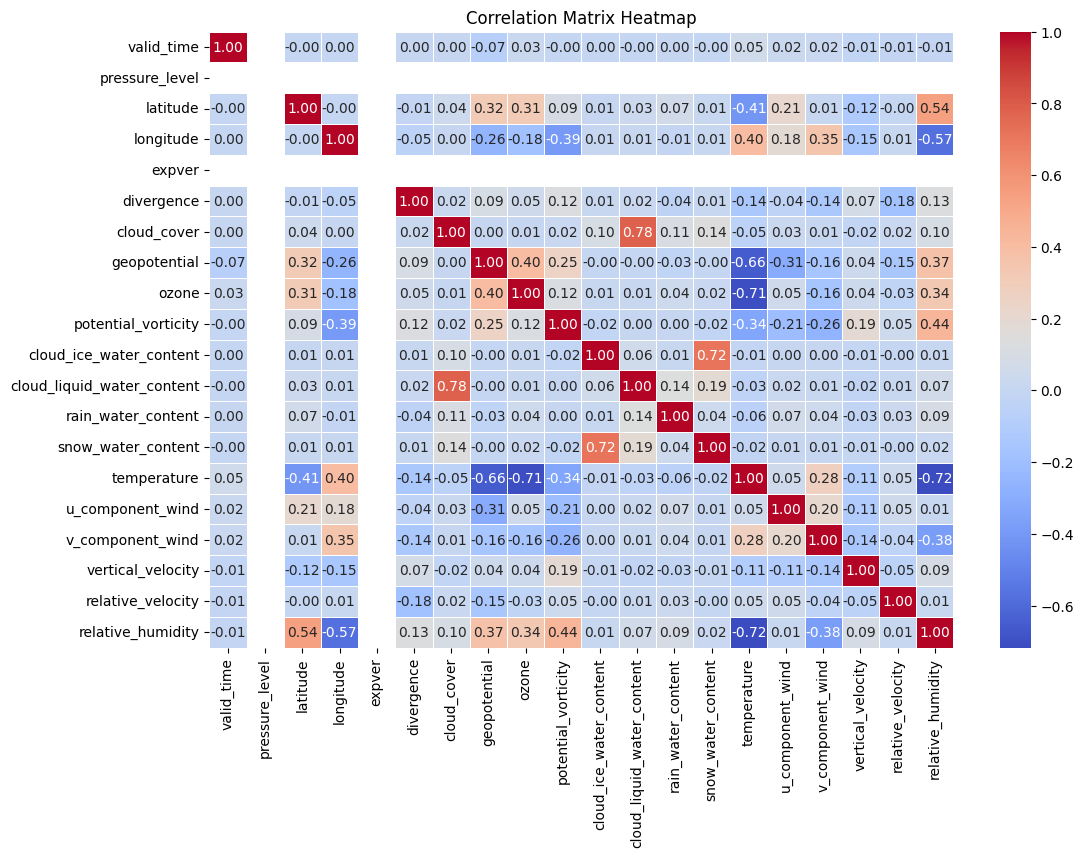

In [70]:
temp_df = X_df.copy()
temp_df["relative_humidity"] = y
correlation_matrix = temp_df.corr()
# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

We observe that relative humidity is strongly correlated with latitude, longitude, and temperature, indicating that these variables are crucial for making predictions of relative humidity

# Challenge evaluation

For this challenge, the metrics used to evaluate the performance of the model are the root mean squared error (RMSE) and the mean absolute error (MAE) between the predicted relative humidity and the true one, defined as:
$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_{pred}^i - y_{true}^i)^2}
$$

$$
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_{pred}^i - y_{true}^i|

$$

# Submission format

The goal of the RAMP is to predict the relative humidity at a specific coordinate at a future time instant, spaced 4 time steps apart. Here is an example of a scikit-learn pipeline to fit the training input data using a subset of the columns.

In [71]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer


def extract_date_components(df):
    df = df.copy()
    df["valid_time"] = pd.to_datetime(df["valid_time"])
    df["year"] = df["valid_time"].dt.year
    df["month"] = df["valid_time"].dt.month
    df["day"] = df["valid_time"].dt.day
    
    return df.drop(columns=["valid_time"])

datetime_transformer = FunctionTransformer(extract_date_components)

cols = [
    'latitude',
    'longitude',
    'temperature',
    'divergence',
    'u_component_wind',
    'v_component_wind',
    'cloud_cover'
]

transformer = make_column_transformer(
    (datetime_transformer, ["valid_time"]),
    ('passthrough', cols)
)

pipe = make_pipeline(
    transformer,
    SimpleImputer(strategy='mean'),
    RandomForestRegressor(max_depth=5, n_estimators=10)
)


def get_estimator():
    return pipe

### Testing using a scikit-learn pipeline

In [43]:
from sklearn.model_selection import cross_val_score
import problem

X_df, y = problem.get_train_data()
scores = cross_val_score(get_estimator(), X_df, y, cv=2, scoring='neg_mean_squared_error')
print(scores)

[-154.36953122 -140.7430172 ]


## Submission

To submit your code, you can refer to the [online documentation](https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html).